In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Exploration
df = pd.read_csv('Indian Startups.csv')

# Inspect first few rows
df.head()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,AUTHORIZED_CAPITAL,PAIDUP_CAPITAL,DATE_OF_REGISTRATION,REGISTRAR_OF_COMPANIES,PRINCIPAL_BUSINESS_ACTIVITY,REGISTERED_OFFICE_ADDRESS,SUB_CATEGORY
0,U55101AN2007PTC000082,GOLDEN REST ROOM PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,1000000,100000,26-03-2007,RoC-Chennai,Trading,Golden Rest room Prem Nagar Port Blair Andaman...,Indian Non-Government Company
1,U01111AN2007PTC000087,ANDAMAN AGRO PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,2000000,100000,08/06/07 0:00,RoC-Chennai,Agriculture and Allied Activities,Sadha Bhavan Gurudwara Lane Port Blair Andaman...,Indian Non-Government Company
2,U45201AN2007PTC000086,ANDAMAN NIRMAN PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,2000000,2000000,07/11/07 0:00,RoC-Chennai,Construction,Junglighat Port Blair Andaman and Nicobar Isla...,Indian Non-Government Company
3,U62200AN2007PTC000227,ABLE AVIATION (INDIA) PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,20000000,10000000,20-09-2007,RoC-Chennai,"Transport, storage and Communications","HOUSE NO.M.B-210, PART-II, NEAR INCOME TAX OFF...",Indian Non-Government Company
4,U52190AN1996PTC000053,IMPERIAL AGENCIES PRIVATE LIMITED,ACTIVE,Private,Company Limited by Shares,2500000,2500000,07/10/96 0:00,RoC-Chennai,Trading,2 Middle Point Port Blair Andaman and Nicobar ...,Indian Non-Government Company


In [2]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

CORPORATE_IDENTIFICATION_NUMBER      0
COMPANY_NAME                         0
COMPANY_STATUS                       0
COMPANY_CLASS                        0
COMPANY_CATEGORY                     0
AUTHORIZED_CAPITAL                   0
PAIDUP_CAPITAL                     154
DATE_OF_REGISTRATION                51
REGISTRAR_OF_COMPANIES               0
PRINCIPAL_BUSINESS_ACTIVITY        215
REGISTERED_OFFICE_ADDRESS            1
SUB_CATEGORY                         2
dtype: int64
       CORPORATE_IDENTIFICATION_NUMBER                         COMPANY_NAME  \
count                            20000                                20000   
unique                           20000                                19994   
top              U55101AP1999PTC032586  SAIPRIYA AGRO FARMS PRIVATE LIMITED   
freq                                 1                                    2   

       COMPANY_STATUS COMPANY_CLASS           COMPANY_CATEGORY  \
count           20000         20000                      

In [3]:
# Step 2: Data Preprocessing

# Handling missing values
# Fill numeric columns with mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encoding categorical variables
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Scaling numerical features
scaler = StandardScaler()

# Corrected: Using actual numerical columns from your dataset
numerical_cols_for_scaling = ['AUTHORIZED_CAPITAL', 'PAIDUP_CAPITAL']

# Ensure columns exist
numerical_cols_for_scaling = [col for col in numerical_cols_for_scaling if col in df.columns]

# Apply scaling
if numerical_cols_for_scaling:
    df[numerical_cols_for_scaling] = scaler.fit_transform(df[numerical_cols_for_scaling])
else:
    print("No numerical columns available for scaling!")

In [4]:
# Step 3: Split the dataset into training and testing sets

# For now, pick a target column.
# Since your dataset doesn't have a "Target", let's assume "COMPANY_STATUS" (Active/Inactive) as Target
if 'COMPANY_STATUS' not in df.columns:
    raise ValueError("Target column not found. Please replace with correct one.")

X = df.drop('COMPANY_STATUS', axis=1)
y = df['COMPANY_STATUS']

# Optional: encode y if needed
if y.dtype == 'object':
    y = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print(df.shape)

(20000, 12)


In [6]:
# Step 4: SVM Implementation (Experimenting with different kernels)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_models = {}

# Temporarily downsample for faster testing
X_train_small = X_train.sample(5000, random_state=42)
y_train_small = y_train.loc[X_train_small.index]

# Downsample X_test accordingly (optional for strict comparison)
X_test_small = X_test  # Keeping it full is fine for now

for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel on small sample...")

    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train_small, y_train_small)

    # Store the model if needed
    svm_models[kernel] = svm

    # Make predictions
    y_pred = svm.predict(X_test_small)  # predicting on full X_test is acceptable

    # Model evaluation
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Training SVM with linear kernel on small sample...
Kernel: linear
Accuracy: 0.6780
Confusion Matrix:
[[2613    0    0    0  128    0]
 [   3    0    0    0    0    0]
 [  15    0    0    0    3    0]
 [   1    0    0    0    0    0]
 [ 969    0    0    0   99    0]
 [ 165    0    0    0    4    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.95      0.80      2741
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00         1
           5       0.42      0.09      0.15      1068
           7       0.00      0.00      0.00       169

    accuracy                           0.68      4000
   macro avg       0.19      0.17      0.16      4000
weighted avg       0.59      0.68      0.59      4000


Training SVM with poly kernel on small sample...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kernel: poly
Accuracy: 0.6853
Confusion Matrix:
[[2741    0    0    0    0    0]
 [   3    0    0    0    0    0]
 [  18    0    0    0    0    0]
 [   1    0    0    0    0    0]
 [1068    0    0    0    0    0]
 [ 169    0    0    0    0    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.81      2741
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00      1068
           7       0.00      0.00      0.00       169

    accuracy                           0.69      4000
   macro avg       0.11      0.17      0.14      4000
weighted avg       0.47      0.69      0.56      4000


Training SVM with rbf kernel on small sample...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kernel: rbf
Accuracy: 0.6853
Confusion Matrix:
[[2741    0    0    0    0    0]
 [   3    0    0    0    0    0]
 [  18    0    0    0    0    0]
 [   1    0    0    0    0    0]
 [1068    0    0    0    0    0]
 [ 169    0    0    0    0    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.81      2741
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00      1068
           7       0.00      0.00      0.00       169

    accuracy                           0.69      4000
   macro avg       0.11      0.17      0.14      4000
weighted avg       0.47      0.69      0.56      4000


Training SVM with sigmoid kernel on small sample...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kernel: sigmoid
Accuracy: 0.5910
Confusion Matrix:
[[2053    0    0    0  682    6]
 [   3    0    0    0    0    0]
 [  16    0    0    0    2    0]
 [   1    0    0    0    0    0]
 [ 756    0    0    0  311    1]
 [ 127    0    0    0   42    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      2741
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00         1
           5       0.30      0.29      0.30      1068
           7       0.00      0.00      0.00       169

    accuracy                           0.59      4000
   macro avg       0.17      0.17      0.17      4000
weighted avg       0.56      0.59      0.57      4000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


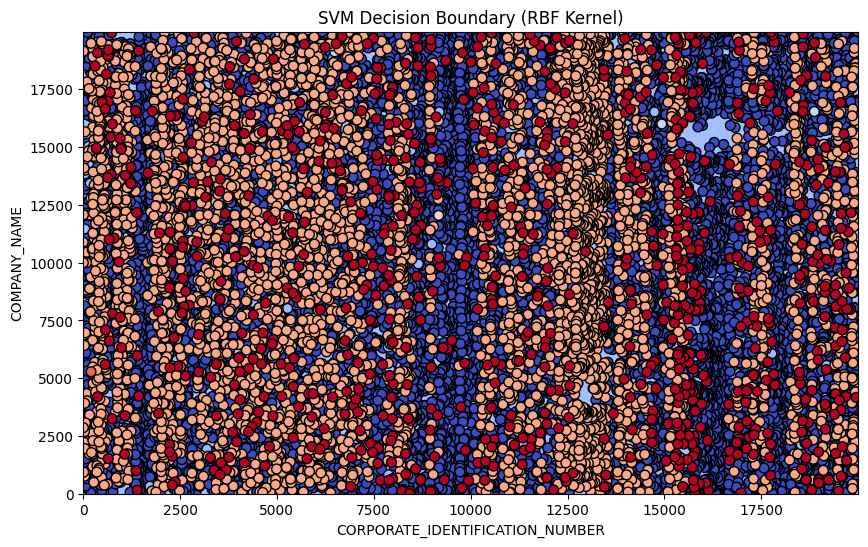

In [7]:
# Step 5: Visualize decision boundary (optional for 2D data)

# For visualization, select any 2 numerical features
features_for_visualization = df.select_dtypes(include=[np.number]).columns[:2]

if len(features_for_visualization) < 2:
    print("Not enough numerical features to visualize decision boundary.")
else:
    # Ensure X_2d is a pandas DataFrame with correct feature names
    X_2d = df[features_for_visualization].copy()
    y_2d = y  # target remains the same

    # Train-test split with pandas DataFrames
    X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.2, random_state=42)

    # Use RBF kernel for visualization
    svm_rbf = SVC(kernel='rbf')

    # Ensure that both training and test sets have valid feature names
    svm_rbf.fit(X_train_2d, y_train_2d)

    # Create a mesh grid for visualization
    xx, yy = np.meshgrid(np.linspace(X_2d.iloc[:, 0].min(), X_2d.iloc[:, 0].max(), 100),
                         np.linspace(X_2d.iloc[:, 1].min(), X_2d.iloc[:, 1].max(), 100))

    Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X_2d.iloc[:, 0], X_2d.iloc[:, 1], c=y_2d, edgecolors='k', marker='o', s=50, cmap='coolwarm')
    plt.title('SVM Decision Boundary (RBF Kernel)')
    plt.xlabel(features_for_visualization[0])
    plt.ylabel(features_for_visualization[1])
    plt.show()